In [1]:
# Nature style
import matplotlib.pyplot as plt

small_font = 5
big_font = 7
fontsize = 7
capsize = 1.5
plt.rcParams.update({
    # Figure size and DPI
    'figure.dpi': 300, # High DPI for initial saving
    'savefig.dpi': 300, # High DPI for output file
    'savefig.bbox': 'tight', # Removes excess white space around figure
    'savefig.transparent': True, # Make the background transparent
    
    # Font settings
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica'], # Use Helvetica or Arial
    'pdf.fonttype': 42,
    # size: 5-7 
    'font.size': fontsize, # Base size. Axes labels will be this size.
    'axes.titlesize': fontsize, # Size of the axes title
    'axes.labelsize': fontsize, # Size of the x and y labels
    'xtick.labelsize': fontsize, # Size of the x-tick labels
    'ytick.labelsize': fontsize, # Size of the y-tick labels
    'legend.fontsize': fontsize, # Size of the legend text
    
    # Line settings
    'lines.linewidth': .5,
    'lines.markersize': 2,
    
    # Axes settings
    'axes.linewidth': 0.5, # Width of the axes border
    'xtick.major.width': 0.5, # Width of the x-tick lines
    'ytick.major.width': 0.5, # Width of the y-tick lines
    'xtick.major.size': 3, # Length of the x-ticks
    'ytick.major.size': 3, # Length of the y-ticks
    
    # Other settings
    'legend.frameon': False, # Remove the box around the legend
    'legend.handlelength': 1.5, # Length of the legend lines
})

# Define the WIDTH of your figure in inches (Single column: 89 mm, double column: 183 mm, max height: 170 mm)
width_in_inches = 85/25.4 # 85 mm
height_in_inches = 85/25.4 # 85 mm
figsize=(width_in_inches, height_in_inches)

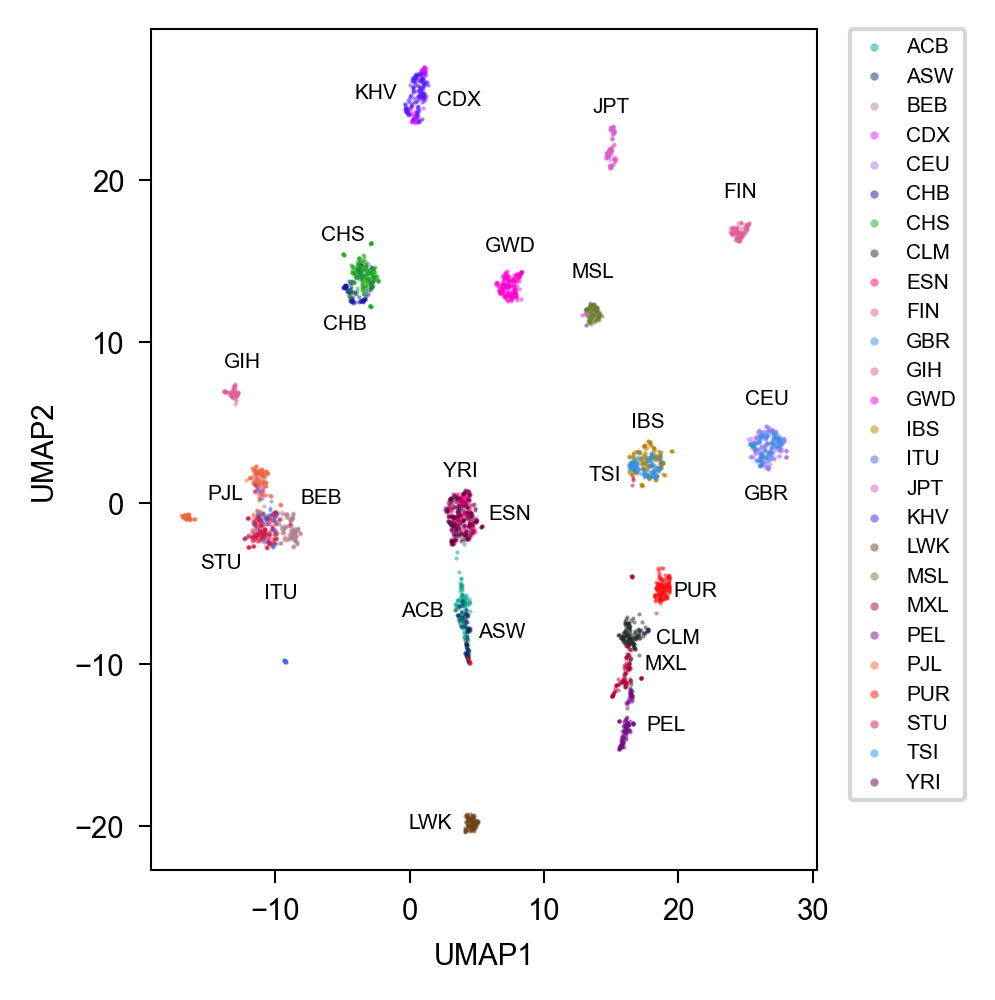

In [2]:
# Prepare a list of coordinates for plotting labels near the mean of each population

import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

fn = './umap_complete_data.csv'
df = pd.read_csv(fn, sep=',')
# df has columns: Population, UMAP1, UMAP2, SP, Color

pop2abbrev = {
    'African American': 'ASW',  # African Ancestry in Southwest US 
    'African Caribbean': 'ACB',  # African Caribbean in Barbados 
    'Bengali Bangladesh': 'BEB',  # Bengali in Bangladesh 
    'British': 'GBR',  # British in England and Scotland 
    'Colombian': 'CLM',  # Colombian in Medellin, Colombia 
    'Dai Chinese': 'CDX',  # Chinese Dai in Xishuangbanna, China 
    'Esan Nigerian': 'ESN',  # Esan in Nigeria 
    'Finnish': 'FIN',  # Finnish in Finland 
    'Gambian': 'GWD',  # Gambian in Western Division, The Gambia 
    'Gujarati Indian': 'GIH',  # Gujarati Indian in Houston, TX 
    'Han Chinese': 'CHB',  # Han Chinese in Beijing, China 
    'Iberian Spain': 'IBS',  # Iberian populations in Spain 
    'Indian Telugu': 'ITU',  # Indian Telugu in the UK 
    'Japanese': 'JPT',  # Japanese in Tokyo, Japan 
    'Kinh Vietnamese': 'KHV',  # Kinh in Ho Chi Minh City, Vietnam 
    'Luhya Kenyan': 'LWK',  # Luhya in Webuye, Kenya 
    'Mende Sierra Leonean': 'MSL',  # Mende in Sierra Leone 
    'Mexican': 'MXL',  # Mexican Ancestry in Los Angeles, California 
    'Northern/Western European': 'CEU',  # Utah residents (CEPH) with Northern and Western European ancestry 
    'Peruvian': 'PEL',  # Peruvian in Lima, Peru 
    'Puerto Rican': 'PUR',  # Puerto Rican in Puerto Rico 
    'Punjabi Pakistan': 'PJL',  # Punjabi in Lahore, Pakistan 
    'Southern Han Chinese': 'CHS',  # Han Chinese South 
    'Sri Lankan Tamil': 'STU',  # Sri Lankan Tamil in the UK 
    'Toscani Italian': 'TSI',  # Toscani in Italia 
    'Yoruba Nigerian': 'YRI',  # Yoruba in Ibadan, Nigeria 
}

# add a column to df with the abbreviation of the population
df['Abbreviation'] = df['Population'].map(pop2abbrev)

# get the color of each population from the Color column
color_map = {row['Abbreviation']: row['Color'] for _, row in df.drop_duplicates('Abbreviation').iterrows()}
# modify few colors
color_map['ITU'] = 'royalblue'
color_map['STU'] = 'Crimson'

# Make a scatter plot for df, using the UMAP1 and UMAP2 columns as the x and y coordinates,
# and the Color column as the color of each point

fig, ax = plt.subplots(figsize=figsize)

# Plot each population with its color
for abbrev, pop_df in df.groupby('Abbreviation'):
    ax.scatter(
        pop_df['UMAP1'], pop_df['UMAP2'],
        label=abbrev,
        color=color_map[abbrev],
        alpha=0.5,
        s=1, 
        edgecolors=color_map[abbrev],
        linewidths=0,
    )

# Add population labels at the given offset from the mean of each population
# Calculate the mean UMAP1 and UMAP2 for each population for label placement
pop_means = df.groupby('Population')[['UMAP1', 'UMAP2']].mean().reset_index()

offset_x = {
    'African American': 2,
    'African Caribbean': -3,
    'Bengali Bangladesh': 2.5,
    'British': 0,
    'Colombian': 3.5,
    'Dai Chinese': 3,
    'Esan Nigerian': 3.5,
    'Finnish': 0,
    'Gambian': 0,
    'Gujarati Indian': 0,
    'Han Chinese': -1,
    'Iberian Spain': 0,
    'Indian Telugu': 1,
    'Japanese': 0,
    'Kinh Vietnamese': -3,
    'Luhya Kenyan': -3,
    'Mende Sierra Leonean': 0,
    'Mexican': 3,
    'Northern/Western European': 0,
    'Peruvian': 3,
    'Puerto Rican': 3,
    'Punjabi Pakistan': -1,
    'Southern Han Chinese': -1.5,
    'Sri Lankan Tamil': -3,
    'Toscani Italian': -3,
    'Yoruba Nigerian': 0,
}
offset_y = {
    'African American': 0,
    'African Caribbean': 0,
    'Bengali Bangladesh': 2,
    'British': -3,
    'Colombian': 0,
    'Dai Chinese': 0,
    'Esan Nigerian': 0,
    'Finnish': 2.5,
    'Gambian': 2.5,
    'Gujarati Indian': 4,
    'Han Chinese': -2.5,
    'Iberian Spain': 2.5,
    'Indian Telugu': -3,
    'Japanese': 2.5,
    'Kinh Vietnamese': 0,
    'Luhya Kenyan': 0,
    'Mende Sierra Leonean': 2.5,
    'Mexican': 0,
    'Northern/Western European': 3,
    'Peruvian': 0,
    'Puerto Rican': 0,
    'Punjabi Pakistan': 0,
    'Southern Han Chinese': 2.5,
    'Sri Lankan Tamil': -2,
    'Toscani Italian': -0.5,
    'Yoruba Nigerian': 3,
}

for i, pop in enumerate(pop_means['Population']):
    ax.text(
        pop_means['UMAP1'][i] + offset_x[pop], pop_means['UMAP2'][i] + offset_y[pop], pop2abbrev[pop],
        fontsize=small_font, 
        # fontweight='bold',
        color='black',
        ha='center', va='center',
        bbox=dict(
            # facecolor='white',
            # color=color_map[pop], alpha=0.7, 
            color='white', 
            # edgecolor='none',
            linewidth=0,
            boxstyle='round,pad=0.1')
    )

plt.legend(loc='best', fontsize=small_font, markerscale=2, frameon=True, bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
# plt.title('UMAP Coordinates by Population')
plt.tight_layout()
plt.savefig('umap_populations.pdf')
plt.show()


In [3]:
# make a plot of the umap coordinates
def plotly_umap():
    import pandas as pd
    import matplotlib.pyplot as plt

    fn = './umap_complete_data.csv'
    df = pd.read_csv(fn, sep=',')
    print(df.head())
    print(df.columns)
    import plotly.express as px

    fig = px.scatter(
        df,
        x="UMAP1",
        y="UMAP2",
        color="Population",
        color_discrete_map={row['Population']: row['Color'] for _, row in df.drop_duplicates('Population').iterrows()},
        hover_data=["Population", "SP"],
        title="UMAP Coordinates by Population",
        opacity=0.3,
    )
    fig.update_traces(marker=dict(size=6, line=dict(width=0)))
    fig.update_layout(legend_title_text='Population')
    fig.show()

plotly_umap()

  Population      UMAP1     UMAP2   SP    Color
0    British  26.133995  4.191465  EUR  #2E91E5
1    British  27.026894  4.247738  EUR  #2E91E5
2    British  25.691332  3.425868  EUR  #2E91E5
3    British  26.760029  4.446508  EUR  #2E91E5
4    British  25.784350  3.724458  EUR  #2E91E5
Index(['Population', 'UMAP1', 'UMAP2', 'SP', 'Color'], dtype='object')
